# Plot script for 10 year return levels of hourly precipitation

In [22]:
import os
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from healpix_plot import default_plot, get_listed_colormap
from healpix_functions import aggregate_grid
figpath = 'figures_paper'

mpl.rc('font', **{'size': 8})
proj = ccrs.Mollweide()
cm = 1/2.54  # centimeters in inches

In [23]:
index = 'rl10'
icon_z9 = np.load("/work/uc1275/u290389/subgrid_var/rl10_1h_icon_z9_constrainedshape.npy")
ifs_z9 = np.load("/work/uc1275/u290389/subgrid_var/rl10_1h_ifs_z9_constrainedshape.npy")

In [24]:
data_dict = {
    'z9': {
        'icon': icon_z9,
        'ifs': ifs_z9,
    },
    'z9_std_z6': {
        'icon': aggregate_grid(icon_z9, z_out=6, method='std'),
        'ifs': aggregate_grid(ifs_z9, z_out=6, method='std'),
    },
}

In [25]:
levels_rl10 = np.arange(0, 121, 10)
levels_rl10_std = np.arange(0, 21, 2)

kwargs_dict = dict(
    z9 = dict(
        cmap=get_listed_colormap(levels_rl10, 'GnBu', return_colors=True, white='first', extend='max'),
        levels=levels_rl10, 
        extend='max',
    ),
    z9_std_z6 = dict(
        cmap=get_listed_colormap(levels_rl10_std, 'magma_r', return_colors=True, white='first', extend='max'),
        levels=levels_rl10_std, 
        extend='max',
    ),
)

title_dict = {
    'z9': '10-year return level of hourly precipitation (mm/h)',
    'z9_std_z6': '10-year return level of hourly precipitation sub-grid variability (mm/h)',
}

label_dict = {0: '(a)', 1: '(b)', 2: '(c)', 3: '(d)'}

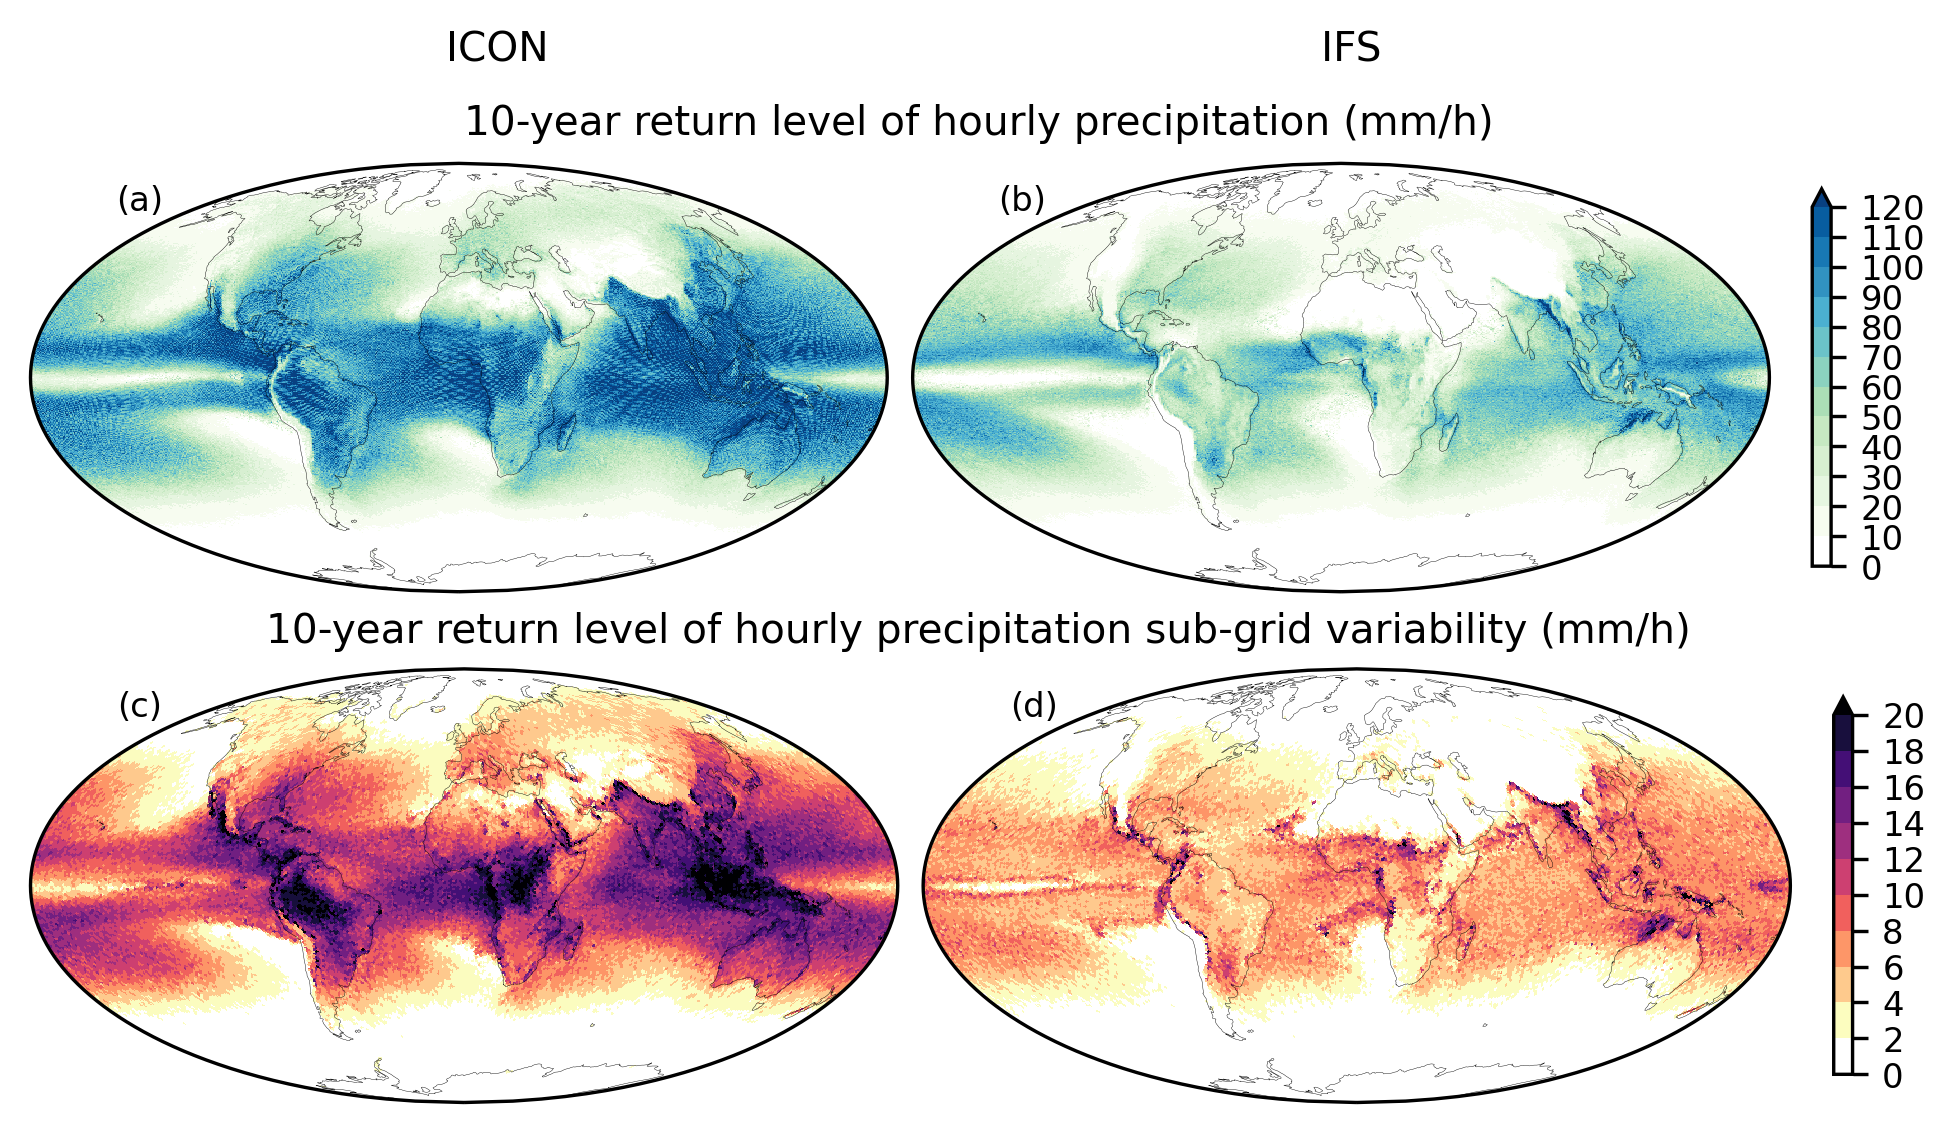

In [26]:
dpi = 305  # NOTE: depending on the exact resolutoin there sometimes is a an atrifact at the zero meridian

fig = plt.figure(constrained_layout=True, figsize=(16*cm, 9.3*cm), dpi=dpi)
fig.suptitle('ICON' + ' ' * 60 + 'IFS' + ' '*10 + '\n')

subfigs = fig.subfigures(nrows=2, ncols=1)

idx = 0
for index, subfig in zip(data_dict, subfigs):
    
    subfig.suptitle(title_dict[index], y=.97, va='bottom')
    
    axes = subfig.subplots(nrows=1, ncols=2, subplot_kw={'projection': proj})

    for model, ax in zip(data_dict[index], axes):
        ax.text(0.1, .95, label_dict[idx], ha='left', va='top', transform=ax.transAxes)
        ax.set_global()
        default_plot(data_dict[index][model], ax=ax, add_colorbar=False if idx % 2 == 0 else True, **kwargs_dict[index])
        idx += 1
        
fig.savefig(os.path.join(figpath, 'figure4.png'), dpi=dpi)
fig.savefig(os.path.join(figpath, 'figure4.pdf'), dpi=dpi)